In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv("src/data/train.csv") 
df_test = pd.read_csv("src/data/test.csv")

df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

x = df_train.drop(['ID', 'Y_LABEL'], axis=1)
y = df_train['Y_LABEL']

df_test = df_test.drop(['ID'], axis = 1)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
le = LabelEncoder()

def get_values(value):
  return value.values.reshape(-1, 1)

categorical_features = ['COMPONENT_ARBITRARY','YEAR']
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

for col in x:
  if col not in categorical_features:
    x_train[col] = scaler.fit_transform(get_values(x_train[col]))
    x_valid[col] = scaler.transform(get_values(x_valid[col]))
    if col in df_test.columns:
        df_test[col] = scaler.transform(get_values(df_test[col]))

for col in categorical_features:
  x_train[col] = le.fit_transform(x_train[col])
  x_valid[col] = le.transform(x_valid[col])
  if col in df_test.columns:
      df_test[col] = le.transform(df_test[col])

C:\Users\User\AppData\Local\Temp\ipykernel_44500\1624444302.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = scaler.fit_transform(get_values(x_train[col]))
C:\Users\User\AppData\Local\Temp\ipykernel_44500\1624444302.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_valid[col] = scaler.transform(get_values(x_valid[col]))
C:\Users\User\AppData\Local\Temp\ipykernel_44500\1624444302.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [14]:
x_train
corr_df = x_train.corr(method='pearson')

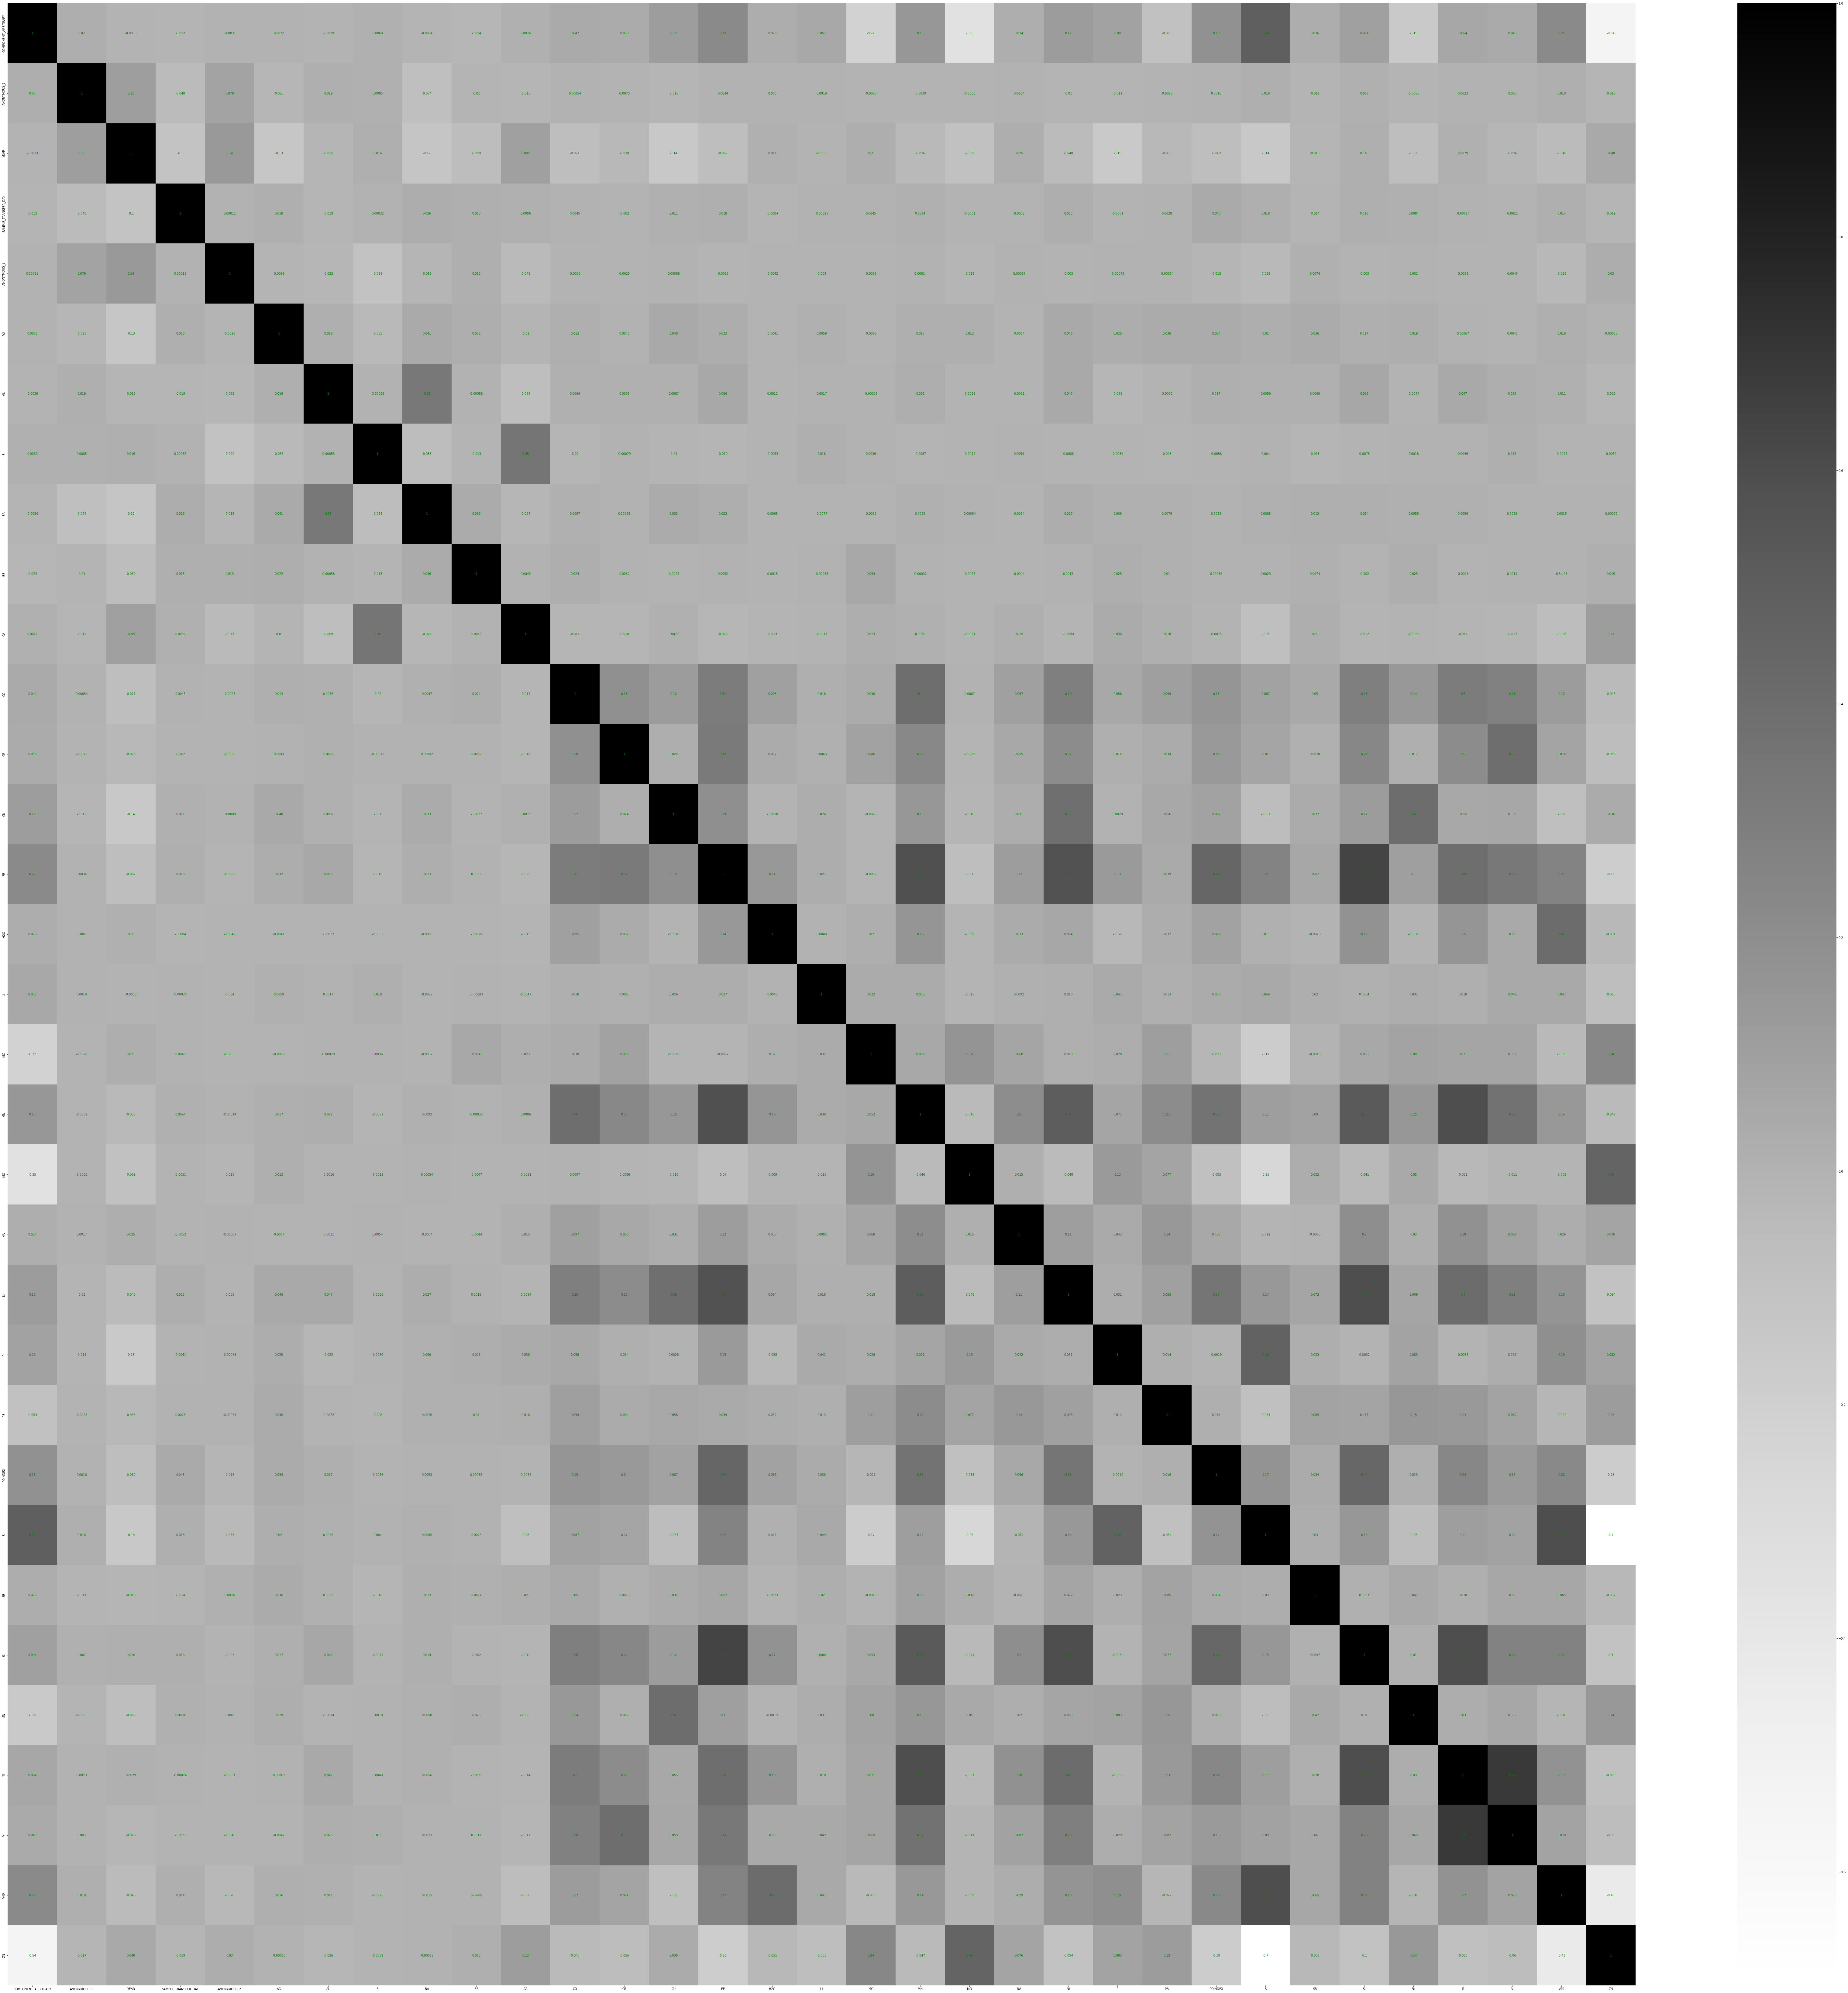

In [15]:
plt.figure(figsize = (120,120))
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [16]:
print(corr_df.unstack())

COMPONENT_ARBITRARY  COMPONENT_ARBITRARY    1.000000
                     ANONYMOUS_1            0.020003
                     YEAR                  -0.003317
                     SAMPLE_TRANSFER_DAY   -0.011528
                     ANONYMOUS_2            0.000305
                                              ...   
ZN                   SN                     0.143752
                     TI                    -0.083303
                     V                     -0.060043
                     V40                   -0.429993
                     ZN                     1.000000
Length: 1089, dtype: float64


In [17]:
s = corr_df.unstack()

df = pd.DataFrame(s['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
df.style.background_gradient(cmap='viridis')

KeyError: 'Y_LABEL'